In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate Sample Data
np.random.seed(42)

In [3]:
# Sample data for batsmen
batsmen_data = {
    "Matches": np.random.randint(10, 100, 50),
    "Innings": np.random.randint(5, 90, 50),
    "Runs": np.random.randint(200, 2000, 50),
    "BallsFaced": np.random.randint(100, 1000, 50),
    "Price": np.random.uniform(0.5, 15, 50) * 1e6  # Price in INR
}

# Sample data for bowlers
bowlers_data = {
    "Matches": np.random.randint(10, 100, 50),
    "Innings": np.random.randint(5, 90, 50),
    "RunsConceded": np.random.randint(500, 3000, 50),
    "Wickets": np.random.randint(10, 150, 50),
    "BallsBowled": np.random.randint(200, 1200, 50),
    "Price": np.random.uniform(0.5, 10, 50) * 1e6  # Price in INR
}

In [4]:
# Convert to DataFrames
batsmen_df = pd.DataFrame(batsmen_data)
bowlers_df = pd.DataFrame(bowlers_data)

In [7]:
# Step 2: Data Preprocessing
# Splitting data and scaling for batsmen
X_batsmen = batsmen_df.drop("Price", axis=1)
y_batsmen = batsmen_df["Price"]
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_batsmen, y_batsmen, test_size=0.2, random_state=42)

# Standardize features
scaler_batsmen = StandardScaler()
X_b_train = scaler_batsmen.fit_transform(X_b_train)
X_b_test = scaler_batsmen.transform(X_b_test)

# Splitting data and scaling for bowlers
X_bowlers = bowlers_df.drop("Price", axis=1)
y_bowlers = bowlers_df["Price"]
X_bo_train, X_bo_test, y_bo_train, y_bo_test = train_test_split(X_bowlers, y_bowlers, test_size=0.2, random_state=42)

# Standardize features
scaler_bowlers = StandardScaler()
X_bo_train = scaler_bowlers.fit_transform(X_bo_train)
X_bo_test = scaler_bowlers.transform(X_bo_test)

In [8]:
# Step 3: Model Training and Prediction
# SVR for batsmen
svr_batsmen = SVR(kernel="linear", C=1.0, epsilon=0.1)
svr_batsmen.fit(X_b_train, y_b_train)
y_b_pred = svr_batsmen.predict(X_b_test)

# Linear Regression for bowlers
lr_bowlers = LinearRegression()
lr_bowlers.fit(X_bo_train, y_bo_train)
y_bo_pred = lr_bowlers.predict(X_bo_test)

Mean Absolute Error for Batsmen (SVR): 3300605.4544376014
Mean Absolute Error for Bowlers (Linear Regression): 3127488.375029132

Batsmen Price Prediction Results:
     Actual Price  Predicted Price    Difference
13  4.150843e+06     7.131260e+06 -2.980417e+06
39  3.204518e+06     7.131270e+06 -3.926752e+06
30  3.945744e+06     7.131282e+06 -3.185537e+06
45  3.784189e+06     7.131302e+06 -3.347113e+06
17  1.034861e+06     7.131270e+06 -6.096409e+06
48  1.051860e+07     7.131241e+06  3.387356e+06
26  1.479193e+07     7.131274e+06  7.660658e+06
25  7.597065e+06     7.131265e+06  4.657997e+05
32  5.832855e+06     7.131264e+06 -1.298409e+06
19  7.788846e+06     7.131242e+06  6.576040e+05

Bowlers Price Prediction Results:
     Actual Price  Predicted Price    Difference
13  7.450654e+06     5.598663e+06  1.851991e+06
39  6.223189e+06     5.551068e+06  6.721207e+05
30  9.606144e+06     3.294069e+06  6.312075e+06
45  9.343827e+06     6.375209e+06  2.968618e+06
17  8.737608e+06     4.235184e+

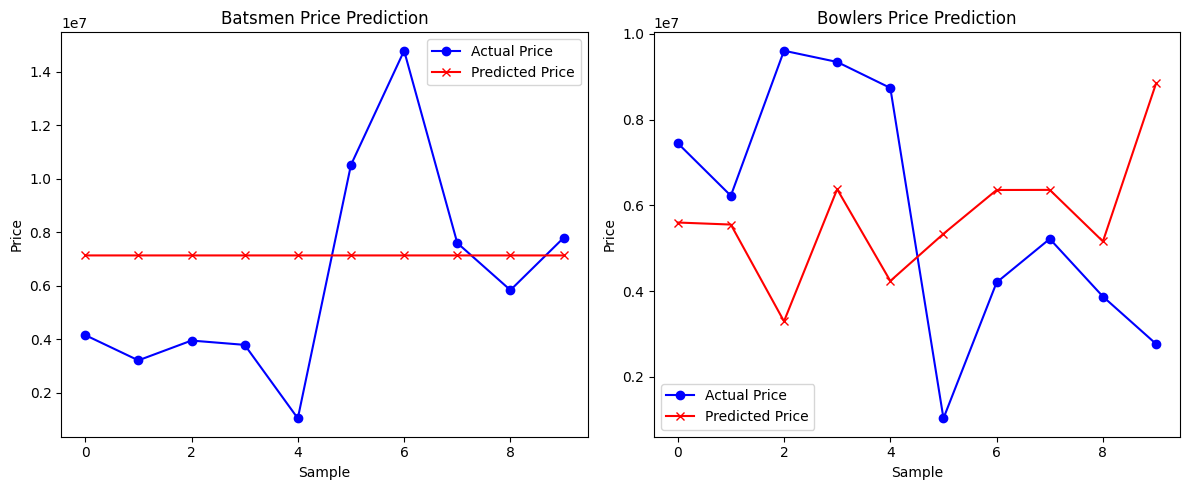

In [12]:
# Step 4: Evaluation

# Calculate Mean Absolute Error (MAE) to evaluate the models
mae_batsmen = mean_absolute_error(y_b_test, y_b_pred)
mae_bowlers = mean_absolute_error(y_bo_test, y_bo_pred)

# Print the Mean Absolute Errors for both models
print(f"Mean Absolute Error for Batsmen (SVR): {mae_batsmen}")
print(f"Mean Absolute Error for Bowlers (Linear Regression): {mae_bowlers}")

# Create DataFrames to show actual vs. predicted prices for clarity
batsmen_results = pd.DataFrame({"Actual Price": y_b_test, "Predicted Price": y_b_pred, "Difference": y_b_test - y_b_pred})
bowlers_results = pd.DataFrame({"Actual Price": y_bo_test, "Predicted Price": y_bo_pred, "Difference": y_bo_test - y_bo_pred})

# Display results as tables
print("\nBatsmen Price Prediction Results:\n", batsmen_results)
print("\nBowlers Price Prediction Results:\n", bowlers_results)

# Step 5: Visualization

# Plot for batsmen: Actual vs Predicted prices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batsmen_results["Actual Price"].values, label="Actual Price", color="blue", marker="o")
plt.plot(batsmen_results["Predicted Price"].values, label="Predicted Price", color="red", marker="x")
plt.title("Batsmen Price Prediction")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()

# Plot for bowlers: Actual vs Predicted prices
plt.subplot(1, 2, 2)
plt.plot(bowlers_results["Actual Price"].values, label="Actual Price", color="blue", marker="o")
plt.plot(bowlers_results["Predicted Price"].values, label="Predicted Price", color="red", marker="x")
plt.title("Bowlers Price Prediction")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()

Mean Absolute Error for Batsmen (SVR): 3300605.4544376014
Mean Absolute Error for Bowlers (Linear Regression): 3127488.375029132


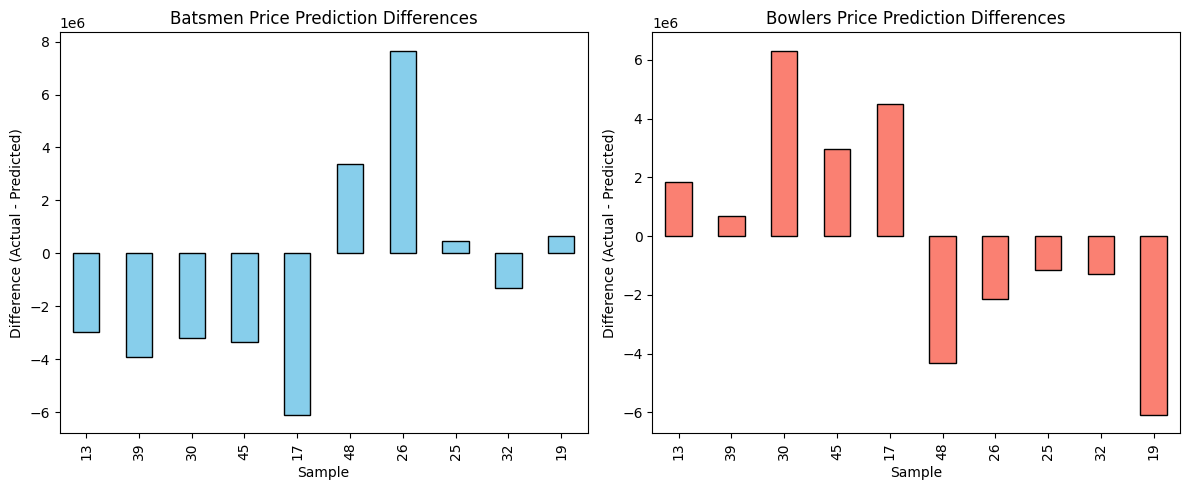

In [13]:
#with bar graph analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Generate Sample Data
np.random.seed(42)

# Generate sample data for batsmen
batsmen_data = {
    "Matches": np.random.randint(10, 100, 50),
    "Innings": np.random.randint(5, 90, 50),
    "Runs": np.random.randint(200, 2000, 50),
    "BallsFaced": np.random.randint(100, 1000, 50),
    "Price": np.random.uniform(0.5, 15, 50) * 1e6
}

# Generate sample data for bowlers
bowlers_data = {
    "Matches": np.random.randint(10, 100, 50),
    "Innings": np.random.randint(5, 90, 50),
    "RunsConceded": np.random.randint(500, 3000, 50),
    "Wickets": np.random.randint(10, 150, 50),
    "BallsBowled": np.random.randint(200, 1200, 50),
    "Price": np.random.uniform(0.5, 10, 50) * 1e6
}

# Convert to DataFrames
batsmen_df = pd.DataFrame(batsmen_data)
bowlers_df = pd.DataFrame(bowlers_data)

# Step 2: Data Preprocessing
X_batsmen = batsmen_df.drop("Price", axis=1)
y_batsmen = batsmen_df["Price"]
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_batsmen, y_batsmen, test_size=0.2, random_state=42)

scaler_batsmen = StandardScaler()
X_b_train = scaler_batsmen.fit_transform(X_b_train)
X_b_test = scaler_batsmen.transform(X_b_test)

X_bowlers = bowlers_df.drop("Price", axis=1)
y_bowlers = bowlers_df["Price"]
X_bo_train, X_bo_test, y_bo_train, y_bo_test = train_test_split(X_bowlers, y_bowlers, test_size=0.2, random_state=42)

scaler_bowlers = StandardScaler()
X_bo_train = scaler_bowlers.fit_transform(X_bo_train)
X_bo_test = scaler_bowlers.transform(X_bo_test)

# Step 3: Model Training and Prediction
svr_batsmen = SVR(kernel="linear", C=1.0, epsilon=0.1)
svr_batsmen.fit(X_b_train, y_b_train)
y_b_pred = svr_batsmen.predict(X_b_test)

lr_bowlers = LinearRegression()
lr_bowlers.fit(X_bo_train, y_bo_train)
y_bo_pred = lr_bowlers.predict(X_bo_test)

# Step 4: Evaluation
mae_batsmen = mean_absolute_error(y_b_test, y_b_pred)
mae_bowlers = mean_absolute_error(y_bo_test, y_bo_pred)

print(f"Mean Absolute Error for Batsmen (SVR): {mae_batsmen}")
print(f"Mean Absolute Error for Bowlers (Linear Regression): {mae_bowlers}")

# Step 5: Visualization - Differences between Actual and Predicted Prices
batsmen_results = pd.DataFrame({"Actual Price": y_b_test, "Predicted Price": y_b_pred, "Difference": y_b_test - y_b_pred})
bowlers_results = pd.DataFrame({"Actual Price": y_bo_test, "Predicted Price": y_bo_pred, "Difference": y_bo_test - y_bo_pred})

# Plotting the differences as bar charts
plt.figure(figsize=(12, 5))

# Batsmen Price Differences
plt.subplot(1, 2, 1)
batsmen_results['Difference'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Batsmen Price Prediction Differences")
plt.xlabel("Sample")
plt.ylabel("Difference (Actual - Predicted)")

# Bowlers Price Differences
plt.subplot(1, 2, 2)
bowlers_results['Difference'].plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Bowlers Price Prediction Differences")
plt.xlabel("Sample")
plt.ylabel("Difference (Actual - Predicted)")

plt.tight_layout()
plt.show()

Mean Absolute Error for SVR Model: 3.7200184460165735

Actual vs. Predicted Prices (SVR Model):
               Player  Actual Price  Predicted Price (SVR)
0     Shikhar Dhawan          8.25               8.240380
1       David Warner          6.25              10.448136
2           KL Rahul         17.00               7.601204
3       Rishabh Pant         16.00               9.471359
4     Faf du Plessis          7.00               8.557040
5        Jos Buttler         10.00               9.170016
6       Shreyas Iyer         12.25               7.013566
7       David Miller          3.00               8.969025
8       Ishan Kishan         15.25               7.724163
9        Nitish Rana          8.00               7.716043
10    Rahul Tripathi          8.50               7.954023
11      Prithvi Shaw          7.50               8.060779
12    Marcus Stoinis          9.20               8.054897
13    Jonny Bairstow          6.75               6.760362
14         Phil Salt          1.5

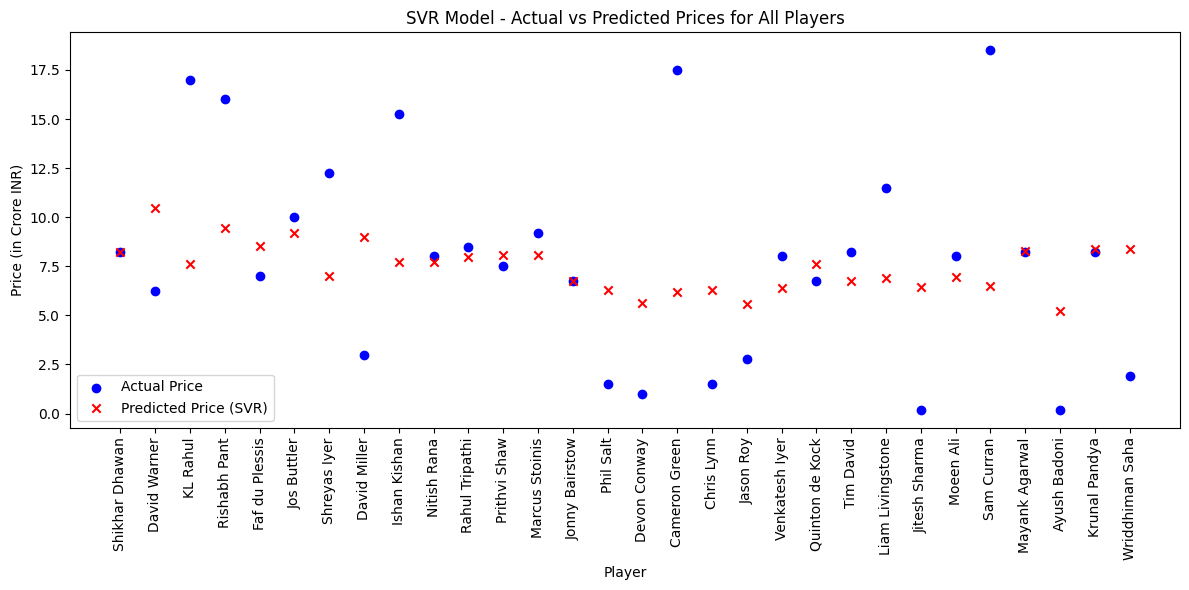

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the Provided Dataset
data = {
    "Player": ["Shikhar Dhawan", "David Warner", "KL Rahul", "Rishabh Pant", "Faf du Plessis", "Jos Buttler",
               "Shreyas Iyer", "David Miller", "Ishan Kishan", "Nitish Rana", "Rahul Tripathi", "Prithvi Shaw",
               "Marcus Stoinis", "Jonny Bairstow", "Phil Salt", "Devon Conway", "Cameron Green", "Chris Lynn",
               "Jason Roy", "Venkatesh Iyer", "Quinton de Kock", "Tim David", "Liam Livingstone", "Jitesh Sharma",
               "Moeen Ali", "Sam Curran", "Mayank Agarwal", "Ayush Badoni", "Krunal Pandya", "Wriddhiman Saha"],
    "Matches": [222, 184, 132, 111, 145, 107, 116, 130, 105, 107, 95, 79, 96, 50, 21, 23, 29, 42, 21, 51, 107, 38,
                39, 40, 67, 59, 127, 12, 127, 170],
    "Innings": [221, 184, 123, 110, 138, 106, 115, 124, 99, 101, 93, 79, 88, 50, 21, 22, 28, 42, 21, 49, 107, 35, 39,
                36, 57, 48, 121, 10, 111, 145],
    "Runs": [6769, 6565, 4683, 3284, 4571, 3582, 3127, 2924, 2644, 2636, 2236, 1892, 1866, 1589, 653, 924, 707, 1329,
             614, 1326, 3157, 659, 939, 730, 1162, 883, 2661, 245, 1647, 2934],
    "BallsFaced": [5324, 4697, 3479, 2205, 3352, 2428, 2453, 2100, 1946, 1952, 1605, 1283, 1314, 1100, 372, 654, 460,
                   945, 443, 967, 2352, 387, 578, 483, 821, 647, 2000, 180, 1240, 2300],
    "Price": [8.25, 6.25, 17.0, 16.0, 7.0, 10.0, 12.25, 3.0, 15.25, 8.0, 8.5, 7.5, 9.2, 6.75, 1.5, 1.0, 17.5, 1.5,
              2.8, 8.0, 6.75, 8.25, 11.5, 0.2, 8.0, 18.5, 8.25, 0.2, 8.25, 1.9]
}

# Convert the dataset to DataFrame
df = pd.DataFrame(data)

# Step 2: Data Preprocessing
X = df[["Matches", "Innings", "Runs", "BallsFaced"]]  # Features
y = df["Price"]  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Model Training and Prediction
# Using SVR with optimized parameters
svr_model = SVR(kernel="linear", C=100, epsilon=0.01)
svr_model.fit(X_scaled, y)
y_pred_svr = svr_model.predict(X_scaled)

# Step 4: Evaluation
mae_svr = mean_absolute_error(y, y_pred_svr)
print(f"Mean Absolute Error for SVR Model: {mae_svr}")

# Results comparison for actual vs. predicted prices
results = pd.DataFrame({"Player": df["Player"], "Actual Price": y, "Predicted Price (SVR)": y_pred_svr})

print("\nActual vs. Predicted Prices (SVR Model):\n", results)

# Step 5: Visualization
# Plotting actual vs predicted prices for all 30 players
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted prices
plt.scatter(df["Player"], y, color="blue", label="Actual Price", marker="o")
plt.scatter(df["Player"], y_pred_svr, color="red", label="Predicted Price (SVR)", marker="x")
plt.xticks(rotation=90)
plt.title("SVR Model - Actual vs Predicted Prices for All Players")
plt.xlabel("Player")
plt.ylabel("Price (in Crore INR)")
plt.legend()
plt.tight_layout()
plt.show()